# MODELAGEM PREDITIVA E MACHINE LEARNING

link colab:https://colab.research.google.com/drive/19IWzdnhvyD_Qy-Z8iTgZcxOY7VPh8qQH?usp=sharing




# Código 1

**Modelo:Regressão Linear**


A regressão linear é descrita como uma técnica estatística fundamental para modelagem e análise de dados.
 Busca encontrar a relação entre uma variável dependente (resposta) e uma ou mais variáveis independentes (preditoras), assumindo que existe uma relação linear entre elas.

Problema: Obter a previsão de Vendas.

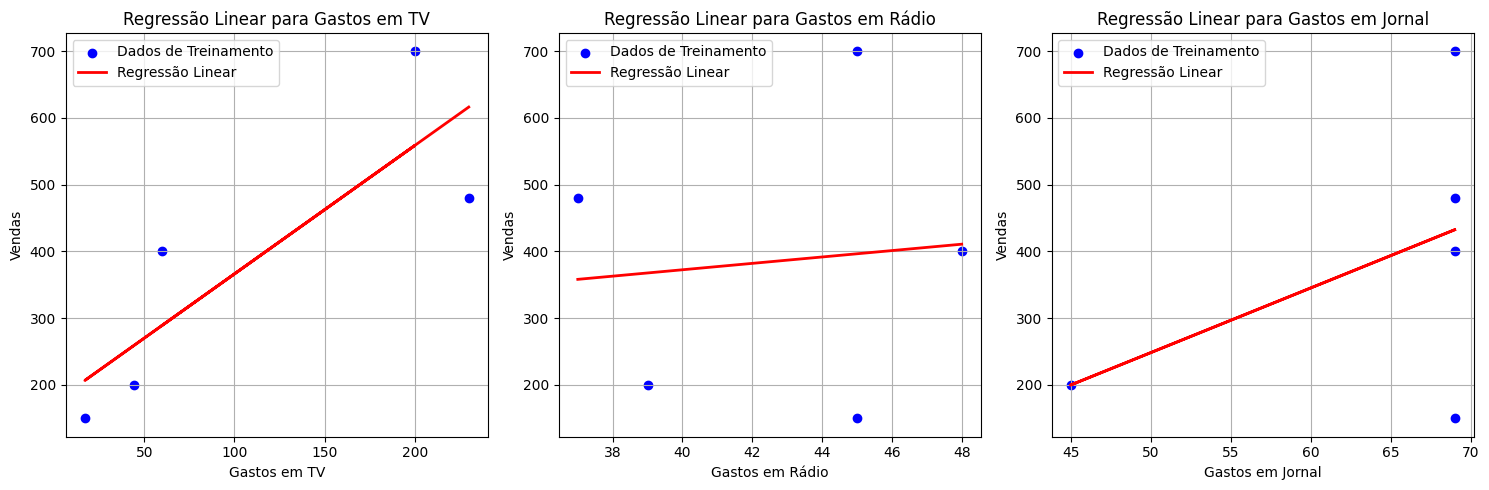

In [ ]:

### 1. Regressão Linear

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados de exemplo
gastos_tv = np.array([230, 44, 17, 200, 60]).reshape(-1, 1) # Reshape para uma matriz 2D
gastos_radio = np.array([37,39,45,45,48]).reshape(-1, 1)
gastos_jornal = np.array([69,45,69,69,69]).reshape(-1, 1)
vendas = np.array([480,200,150,700,400])

# Lista de tuplas para iterar sobre os dados de gastos
dados_gastos = [("TV", gastos_tv), ("Rádio", gastos_radio), ("Jornal", gastos_jornal)]

# Criar o modelo de regressão linear
modelo_regressao = LinearRegression()

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre os dados de gastos
for i, (tipo_gasto, gastos) in enumerate(dados_gastos):
    # Ajustar o modelo aos dados
    modelo_regressao.fit(gastos, vendas)

    # Coeficientes do modelo
    coeficiente = modelo_regressao.coef_
    intercepto = modelo_regressao.intercept_

    # Plotar o gráfico de dispersão dos dados e a linha de regressão
    axs[i].scatter(gastos, vendas, color='blue', label='Dados de Treinamento')
    axs[i].plot(gastos, modelo_regressao.predict(gastos), color='red', linewidth=2, label='Regressão Linear')
    axs[i].set_title(f'Regressão Linear para Gastos em {tipo_gasto}')
    axs[i].set_xlabel(f'Gastos em {tipo_gasto}')
    axs[i].set_ylabel('Vendas')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()



**Interpretação dos Resultados**

O resultado gráfico gerado pelo modelo apresenta uma linha de regressão (em vermelho) sobreposta aos dados de treinamento de vendas e gastos em TV, rádio e jornal.

 A inclinação da reta indica a correlação entre o investimento e o retorno: quanto mais inclinada, maior o impacto do gasto nas vendas. O desempenho do modelo é visualmente avaliado pela proximidade dos pontos azuis (dados reais) em relação à linha vermelha (previsão).

Este resultado é coerente com o problema de regressão, pois o objetivo é prever um valor numérico contínuo (volume de vendas) com base em variáveis preditoras (gastos em TV, Rádio, Jornal).

**Contexto Organizacional:** Em um cenário real, este modelo seria fundamental para a alocação de orçamentos de marketing. Analistas poderiam utilizá-lo para estimar o retorno sobre o investimento (ROI) de diferentes canais de mídia, decidindo onde investir mais verba para maximizar o faturamento trimestral da empresa.



# Código 2

**Modelo: Árvore de Decisão**

É um modelo de aprendizado supervisionado utilizado tanto para classificação quanto para regressão.
Funciona como uma estrutura em forma de árvore, onde cada nó representa uma característica (atributo), cada ramo representa uma decisão baseada nessa característica e cada folha representa o resultado final (uma classe ou valor numérico).

Problema: Obter a classificacao das frutas Laranja e Maçã de acordo com caracteristicas.



Acurácia do modelo: 0.50


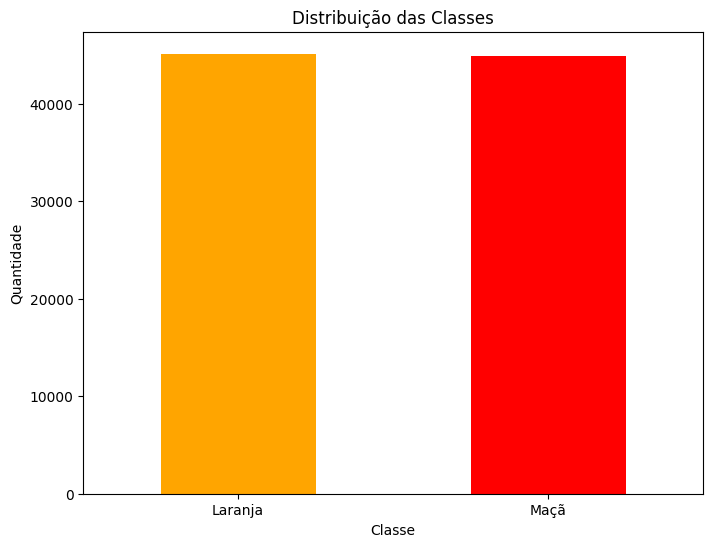

In [ ]:

### 2. Árvore de Decisão

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(42) # Para reproduzibilidade
cores = np.random.choice(['Laranja', 'Vermelha'], size=90000)
texturas = np.random.choice(['Rugosa', 'Lisa'], size=90000)
frutas = np.random.choice(['Laranja', 'Maçã'], size=90000)

# Criar DataFrame
df = pd.DataFrame({'Cor': cores, 'Textura': texturas, 'Fruta': frutas})

# Mapear dados categóricos para numéricos
df['Cor'] = df['Cor'].map({'Laranja': 0, 'Vermelha': 1})
df['Textura'] = df['Textura'].map({'Rugosa': 0, 'Lisa': 1})
df['Fruta'] = df['Fruta'].map({'Laranja': 0, 'Maçã': 1})

# Separar features e target
X = df[['Cor', 'Textura']]
y = df['Fruta']

# Dividir conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Fazer previões no conjunto de teste
previsoes = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia do modelo: {acuracia:.2f}')

# Contagem de amostras de cada classe
contagem_classes = df['Fruta'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
contagem_classes.plot(kind='bar', color=['orange', 'red'])
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks([0,1],['Laranja','Maçã'], rotation=0)
plt.show()



**Interpretação dos resultados**


O modelo classificou as amostras (frutas) criando regras de decisão baseadas nas features "Cor" e "Textura". A acurácia obtida indica a porcentagem de acertos do modelo ao distinguir entre Laranjas e Maçãs no conjunto de teste.


O resultado é coerente com um problema de classificação supervisionada, onde o objetivo é atribuir uma categoria "fruta" a novas entradas de dados.

**Contexto Organizacional:** Este modelo é aplicável na aprovação de crédito bancário (aprovado ou negado) ou aprovação de alunos de acordo com regras estabelecidas.

# Código 3

**Modelo: Randon Forest**

O Random Forest é um algoritmo que pertence à categoria de métodos de ensemble, combinando múltiplos modelos para realizar uma tarefa.
A ideia básica é construir uma "floresta" de árvores de decisão durante o treinamento. Cada árvore é construída de forma independente, usando uma amostra aleatória dos dados e um subconjunto aleatório das características.

Problema: Classificar as diferentes espécies de flores do conjunto de dados Iris (setosa, versicolor e virginica).


Precisão do modelo Random Forest: 1.0


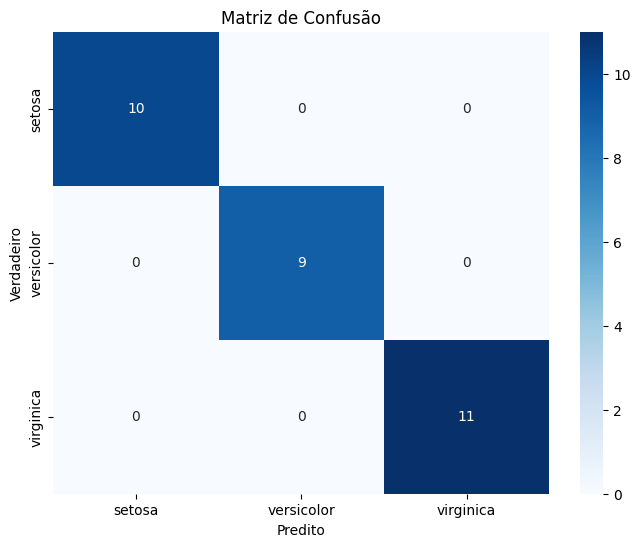

In [ ]:

### 3. Random Forest

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data   # características
y = iris.target # rótulos

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisão do modelo Random Forest:", accuracy)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


**Interpretação do Resultados**

A matriz de confusão gerada pelo código revela não apenas a acurácia global, mas onde o modelo errou (falsos positivos/negativos) ao classificar as espécies de Iris.

Através do grafico podemos identificar a acertividade da classificação do modelo os 3 tipos o algoritmo acertou todos e não gerou falsos positivos.

Acurácia de 100% do modelo.

O resultado é altamente coerente para problemas de classificação complexa, onde as fronteiras entre classes (como as espécies Iris versicolor e Iris virginica) podem não ser linearmente separáveis de forma simples.


**Contexto Organizacional:** É ideal para cenários críticos como detecção de fraudes em transações financeiras ou diagnóstico médico, onde a precisão é prioritária e o sistema precisa lidar com dados ruidosos sem sofrer overfitting facilmente.

# Código 4

**Modelo: SVM (Support Vector Machine)** **Aprendizado Supervisionado**

A Máquina de Vetores de Suporte é um algoritmo supervisionado usado principalmente para classificação e regressão.
Encontrar um hiperplano em um espaço de alta dimensão que possa separar os exemplos de diferentes classes com a maior margem possível.
O hiperplano divide o espaço em duas regiões, separando os pontos de dados em diferentes classes. É eficaz para classificar novos dados desde que sejam linearmente separáveis ou aproximadamente separáveis pelo hiperplano.

Problema: Classificar as features 1  e features 2 em duas classes com base em suas características.

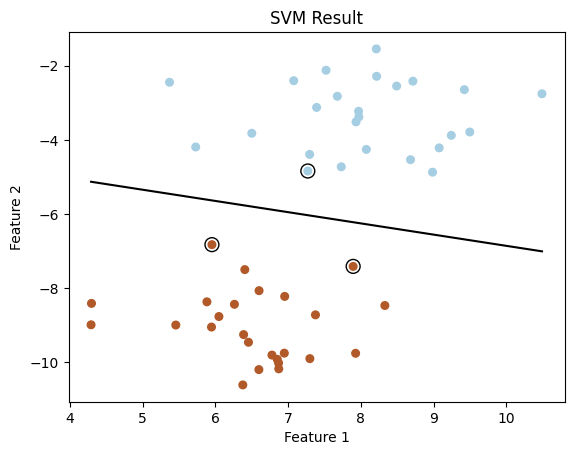

In [ ]:
### 4. SVM (Support Vector Machine)

# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Gerando um conjunto de dados sintético para classificação binária
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# Criando o classificador SVM
clf = svm.SVC(kernel='linear')

# Treinando o modelo SVM
clf.fit(X, y)

# Plotando os pontos de dados
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plotando o hiperplano de separação
# Obtendo os coeficientes do hiperplano
w = clf.coef_[0]
b = clf.intercept_[0]

# Gerando os valores para a linha de separação
x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_plot = - (w[0]* x_plot + b) / w[1]

# Plotando a linha de separação
plt.plot(x_plot, y_plot, 'k-')

# Plotando os vetores de suporte
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.title('SVM Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Interpretação dos Resultados**

O gráfico resultante exibe um hiperplano (linha sólida) que separa as duas classes de dados sintéticos com a maior margem possível. Os pontos circulados no gráfico representam os "vetores de suporte", que são os elementos essenciais para definir essa fronteira.
O desempenho é indicado pela capacidade do hiperplano de manter as classes em regiões distintas sem erros de classificação na amostra visualizada.

O resultado é coerente com a classificação binária, buscando a separação ótima entre dois grupos. A técnica é eficaz em espaços de alta dimensão, garantindo que novos dados sejam classificados com base em qual lado da fronteira eles caem.


**Contexto Organizacional:** Pode ser utilizado em bioinformática para classificar proteínas ou em reconhecimento de imagem e caligrafia, onde é necessário distinguir padrões complexos com alta precisão e margens de segurança bem definidas

# Código 5

**Modelo: KNN (K-Nearest Neighbors)**

O algoritmo de K-vizinhos mais próximos é um método supervisionado simples e intuitivo.
Determinar a classe de um ponto de dados desconhecido com base na classe dos pontos de dados vizinhos a ele.

Classificação vs. Regressão: Em classificação, ele calcula a classe mais comum entre os K vizinhos. Já em regressão, calcula uma média dos valores dos K vizinhos.

Pode ser computacionalmente custoso para grandes conjuntos de dados, pois exige o cálculo da distância entre o ponto de teste e todos os pontos do treino.

Problema: classificar um conjunto pequeno de dados Iris dentre os seus 5 vizinhos próximos, utilizando amostras de treino e teste e, checar a acurácia do modelo. Neste caso o modelo obteve 80% de acurácia.


Acurácia do modelo KNN: 0.8


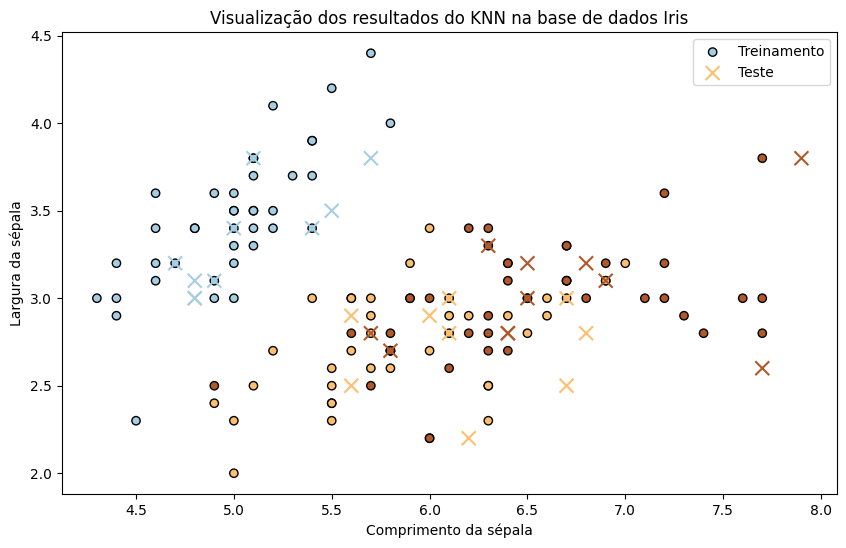

In [ ]:

### 5. KNN (K-Nearest Neighbors)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data[:, :2] # Pegar apenas as duas primeiras características para simplificar a visualização
y = iris.target

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o classificador KNN
k = 5 # Número de vizinhos
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o classificador KNN
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy)

# Plotar os resultados
plt.figure(figsize=(10, 6))

# Plotar os pontos de dados de treinamento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, label='Treinamento', edgecolors='k')

# Plotar os pontos de dados de teste
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Paired, label='Teste', marker='x', s=100)

# Criar uma legenda
plt.legend()

# Adicionar rótulos aos eixos
plt.xlabel('Comprimento da sépala')
plt.ylabel('Largura da sépala')

# Adicionar um título
plt.title('Visualização dos resultados do KNN na base de dados Iris')

plt.show()


**Interpretação dos Resultados**

A visualização mostra as fronteiras de decisão baseadas na proximidade dos pontos. A acurácia do modelo (ex: 0.8 ou 80%) indica que a estratégia de observar a classe dos 5 vizinhos mais próximos (K=5) foi eficaz para prever a espécie da flor na maioria dos casos de teste. O gráfico de dispersão ilustra como novas amostras são classificadas pela "vizinhança" no espaço de características.

O resultado é coerente com o aprendizado baseado em instância (classificação supervisionada), onde não há um modelo explícito pré-treinado, mas sim uma comparação direta com os dados armazenados.

Contexto Organizacional: Pode ser utilizado em sistemas de recomendação (ex: "clientes que compraram este produto também compraram..."), sugerindo itens com base na similaridade de perfil entre consumidores próximos.


# Código 6

**Modelo: Naive Bayes** Aprendizado Supervisionado

É um algoritmo de classificação probabilístico baseado no teorema de Bayes.
Suposição "Ingênua": Assume que as características (features) são independentes entre si, dada a classe. Isso significa que a presença de uma característica não afeta a presença de outra.
Essa suposição simplifica o cálculo da probabilidade condicional, tornando o modelo computacionalmente eficiente, especialmente para grandes conjuntos de dados.

Problema: Classificar os itens do conjunto de dados Iris (setosa, versicolor e virginica). Através do grafico podemos identificar a acertividade da classificação do modelo os 3 tipos o algoritmo acertou todos e não gerou falsos positivos.

Acurácia de 100% do modelo.
Apresentou o mesmo resultado do modelo Randon Forest.

Acurácia do modelo: 1.0


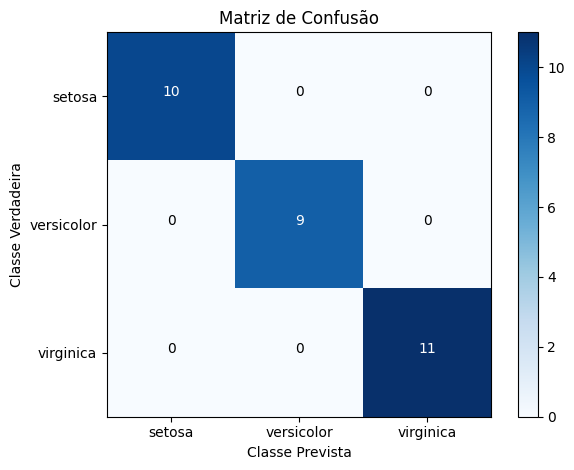

In [ ]:

### 6. Naive Bayes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividindo o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Naive Bayes Gaussiano
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
classes = iris.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.tight_layout()
plt.show()


**Interpretação dos Resultados**

A matriz de confusão resultante demonstra a eficácia do modelo probabilístico em classificar as flores Iris. O desempenho baseia-se no cálculo da probabilidade de uma amostra pertencer a uma classe, dado seus atributos. A alta eficiência computacional observada no código é uma característica marcante deste algoritmo.

O resultado é coerente com a classificação probabilística, aplicando diretamente o Teorema de Bayes. O modelo funciona bem mesmo com menos dados de treinamento em comparação a outros algoritmos complexos.

Contexto Organizacional: Devido à sua rapidez e eficiência com texto, é o modelo padrão para filtros de spam em e-mails corporativos e para análise de sentimentos em redes sociais, classificando comentários como positivos ou negativos em tempo real.